### this dataset for diabetes was already preprocessed in refined numerical values

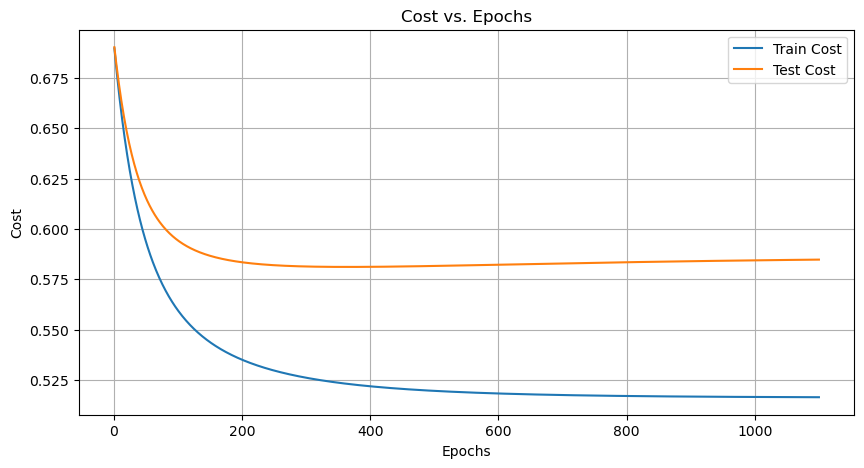

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def plot_data(cost_history_train, cost_history_test):
    epochs = range(1, len(cost_history_train) + 1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, cost_history_train, label='Train Cost')
    plt.plot(epochs, cost_history_test, label='Test Cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost vs. Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    cost_history_train = []
    cost_history_test = []
    
    for epoch in range(num_epochs):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        
        cost_train = cost_function(X, y, theta)
        cost_history_train.append(cost_train)
        

        cost_test = cost_function(X_test, y_test, theta)
        cost_history_test.append(cost_test)
    
    return theta, cost_history_train, cost_history_test

def load_and_preprocess_data(filename):
    data = pd.read_csv(filename, header=None)  
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost





if __name__ == '__main__':
    filename = 'diabetes.csv'  
    X, y = load_and_preprocess_data(filename)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    

    num_epochs = 1100
    learning_rate = 0.03
    theta = np.zeros(X_train.shape[1])  
    

    theta, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_epochs)
    

    plot_data(train_cost_history, test_cost_history)